In [1]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

# Import Data

In [2]:
df = pd.read_csv("dataset/cleaned_text.csv")
df

,text,is_gambling_site
0,daftarmasuk hot games slots casino sports arca...,1
1,pemberitahuan pemeliharaan terjadwal sbo virtu...,1
2,selama waktu ini sbo virtual sports permainan ...,1
3,kami memohon maaf atas ketidaknyamanan yang mu...,1
4,pemeliharaan terjadwal ion slot pada dari am s...,1
...,...,...
1076,republika tvihramrejabarrejogjaretizenbuku rep...,0
1077,balibaliexpressradar surabayaradar gresikradar...,0
1078,dialogis lebih efektifpemerintah mengeklaim di...,0
1079,var eo subcat const base url const asset url c...,0


# Text Preprocessing

In [3]:
stopwords = stopwords.words("indonesian")
stemmer = StemmerFactory().create_stemmer()

In [7]:
def removeStopWords(text: str) -> str:
	"""
	Remove stopwords from the text
	
		param:
			text (str): text that requires stopwords removal
		return:
			new text after stopwords removal
	"""
	
	word_tokens = word_tokenize(text)
	filtered_token = [word for word in word_tokens if word not in stopwords]
	
	return " ".join(filtered_token)

def textStemming(text: str, stemmer: StemmerFactory) -> str:
	"""
	Stem the text using Sastrawi
	
		param:
			text (str): text to stem
			stemmer (StemmerFactory): Sastrawi's stemmer factory
		return:
			new text after stemming
	"""
	
	word_token = word_tokenize(text)
	
	stemmed_token = [stemmer.stem(word) for word in word_token]
	return " ".join(stemmed_token)

def textPreprocessingPipeline(text: str, stemmer: StemmerFactory) -> str:
	"""
	Create pipelne for text processing that includes following steps:
		- stopwords removal
		- text stemming
		
		params:
			text (str): text to preprocess
		return:
			new text after preprocessing
	"""

	preprocessed_text = removeStopWords(text)
	preprocessed_text = textStemming(preprocessed_text, stemmer)

	return preprocessed_text

In [9]:
df["preprocessed_text"] = df["text"].apply(textPreprocessingPipeline, stemmer=stemmer)

# Wordcloud

In [10]:
gambling_words = ""
non_gambling_words = ""

for _, row in df[["preprocessed_text", "is_gambling_site"]].iterrows():
    text = row["preprocessed_text"]
    is_gambling_site = row["is_gambling_site"]

    if is_gambling_site:
        gambling_words += text + " "
    else:
        non_gambling_words += text + " "

In [11]:
gambling_wordcloud = WordCloud(max_words=50, background_color="black").generate(gambling_words)
non_gambling_wordcloud = WordCloud(max_words=50, background_color="black").generate(non_gambling_words)

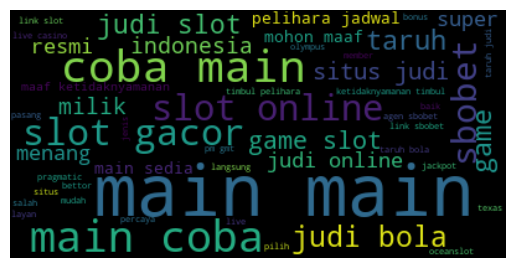

In [12]:
plt.imshow(gambling_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

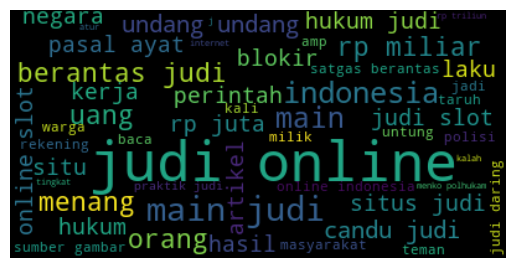

In [13]:
plt.imshow(non_gambling_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.groupby("is_gambling_site").aggregate()